# Pymaceuticals Inc.
---

### Analysis

The correlation coefficient of 0.84 between the mice weight and the average tumor volume indicates that there is a very strong correlation between these two variables. In the linear regression model, we can see that as the mice weight increases by two grams the average tumor volume tends to increase by two cubic millimeters. Given that these mice were prescribed the Capomulin regimen, we can conclude that this medication will be less effective in reducing the tumor size for heavier patients.

The medication Capomulin initially took 21 days until it began reducing a tumor size of 45 cubic millimeters for mouse l509.
After increasing to 48 cubic millimeters at day 20, by day 25, the tumor volume decreased by 4.5 cubic millimeters then slightly increased by one cubic millimeter in the five-day span to day 30. However, by day 35 the size of the tumor decreased to 40.5 cubic millimeters and then increased to 41.5 cubic millimeters by day 45. Based on this observation, the expected daily tumor reduction rate for Capomulin is approximately 0.922 cubic millimeters.

When analyzing the summary statistics, it is very clear how Capomulin and Ramicane outperform the other drug regimens, however the data also indicates that Ramicane is the superior medication. Ramicane’s lower standard deviation, variance, and standard error proves it is more consistent and has a better chance of reducing the tumor volume than Capomulin. This is also apparent in the box plot, where Ramicane’s final tumor volume median, upper whisker, lower quartile, and lower whisker are lower than Capomulin’s, further proving it’s superiority in reducing tumor volume.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
print(mouse_metadata_df.shape)
mouse_metadata_df.head(3)

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [4]:

study_results_df = pd.read_csv(study_results_path)
print(study_results_df.shape)
study_results_df.head(3)

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [5]:
# Combine the data into a single DataFrame
complete_data_df = pd.merge(study_results_df,mouse_metadata_df,on="Mouse ID")

# Display the data table for preview
print(complete_data_df.shape)
complete_data_df.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
Mice_count = complete_data_df["Mouse ID"].nunique()

Mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_series = complete_data_df.duplicated(subset=['Mouse ID','Timepoint'])
Duplicated_Mouse_IDs = complete_data_df.loc[duplicate_row_series, 'Mouse ID'].unique()

Duplicated_Mouse_IDs

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_row_series = complete_data_df["Mouse ID"].isin(Duplicated_Mouse_IDs)
complete_data_df[bad_mice_row_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_data_df[~bad_mice_row_series]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.

Mouse_Count_Check=cleaned_df['Mouse ID'].nunique()

Mouse_Count_Check

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std_dev = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_statistics =pd.DataFrame ({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance,
                     "Tumor Std. Dev.":std_dev,"Tumor Volume Std. Err.":sem
    
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_funcs = {'Tumor Volume (mm3)': ['mean','median','var','std','sem'] }
cleaned_df.groupby('Drug Regimen').agg(agg_funcs)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

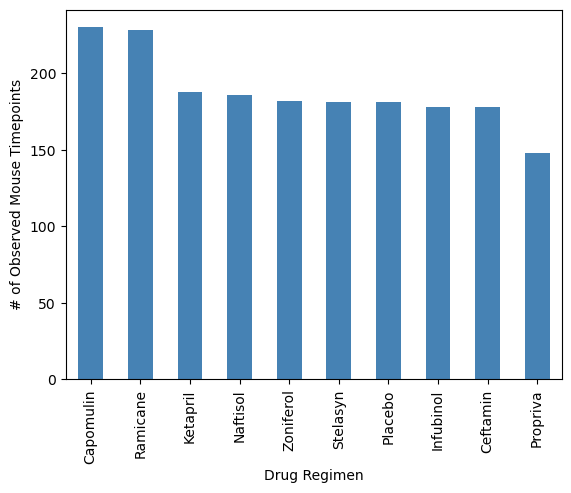

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_ID_Timepoints=cleaned_df["Drug Regimen"].value_counts()
bar_chart=Mouse_ID_Timepoints.plot(kind="bar",color='steelblue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

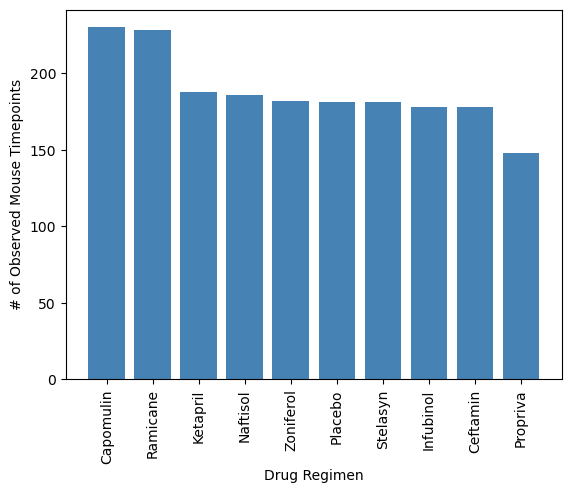

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis= Mouse_ID_Timepoints
Drug_Regimens = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva']
x_axis = range(len(y_axis))

plt.bar(x_axis,y_axis,color='steelblue')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,Drug_Regimens,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")



[]

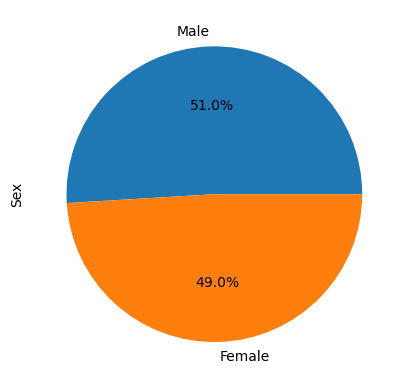

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_of_Mouse = cleaned_df["Sex"].value_counts()
pie_chart = Sex_of_Mouse.plot(kind="pie",autopct='%1.1f%%',subplots=True)
plt.ylabel("Sex")
plt.plot()

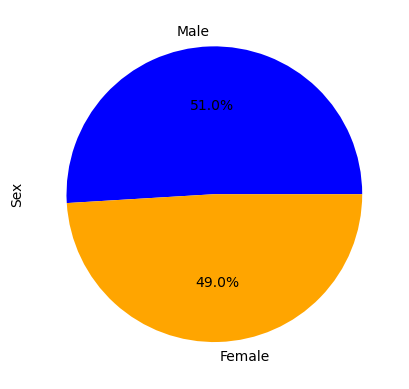

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = Sex_of_Mouse
colors =["blue","orange"]

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots 
### Final Tumor Volume for 4 most promising treatments

In [17]:
 # Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
max_tp_df = pd.DataFrame(max_timepoint)
max_tp_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merge_df = pd.merge(max_tp_df,cleaned_df, on=('Mouse ID','Timepoint'),how='left')
max_timepoint_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels) (Capomulin, Ramicane, Infubinol, and Ceftamin)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# 2 Create empty list to fill with tumor vol data as a series (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

In [19]:
# For each promising treatment
for index, row in max_timepoint_merge_df.iterrows():
    
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    # add the drug tumor volume series to the tumor vol data list (2)
    if row['Drug Regimen'] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ramicane':
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
 
 # add subset 
drug_regimen_df = pd.DataFrame({"Capomulin": tumor_capomulin,"Ramicane": tumor_ramicane,
                                "Infubinol": tumor_infubinol, "Ceftamin": tumor_ceftamin
})

# Calculate the IQR, upper and lower bounds and determine if there are any potential outliers.
cap_quartile = drug_regimen_df['Capomulin'].quantile([.25,.5,.75])
lowerq_cap = cap_quartile[0.25]
upperq_cap = cap_quartile[0.75]
iqr_cap = upperq_cap-lowerq_cap
cap_lower_bound = lowerq_cap- (1.5 * lowerq_cap)
cap_upper_bound = upperq_cap + (1.5 * upperq_cap)

ram_quartile = drug_regimen_df['Ramicane'].quantile([.25,.5,.75])
lowerq_ram =  ram_quartile[0.25]
upperq_ram =  ram_quartile[0.75]
iqr_ram = upperq_ram-lowerq_ram
ram_lower_bound = lowerq_ram - (1.5 * lowerq_ram)
ram_upper_bound = upperq_ram + (1.5 * upperq_ram)


inf_quartile = drug_regimen_df['Infubinol'].quantile([.25,.5,.75])
lowerq_inf = inf_quartile[0.25]
upperq_inf = inf_quartile[0.75]
iqr_inf = upperq_inf-lowerq_inf
inf_lower_bound = lowerq_inf - (1.5 * lowerq_inf)
inf_upper_bound = upperq_inf + (1.5 * upperq_inf)

cef_quartile = drug_regimen_df['Ceftamin'].quantile([.25,.5,.75])
lowerq_cef = cef_quartile[0.25]
upperq_cef = cef_quartile[0.75]
iqr_cef = upperq_cef-lowerq_cef
cef_lower_bound = lowerq_cef - (1.5 * lowerq_cef)
cef_upper_bound = upperq_cef + (1.5 * upperq_cef)

print(f'Capomulin\'s potential outliers: [{cap_lower_bound}, {cap_upper_bound}], {treatments[0]} Tumor Volume (mm3): {sum(tumor_capomulin)} ')
print(f'Ramicane\'s potential outliers: [{ram_lower_bound}, {ram_upper_bound}], {treatments[1]} Tumor Volume (mm3): {sum(tumor_ramicane)} ')
print(f'Infubinol\'s potential outliers: [{inf_lower_bound}, {inf_upper_bound}], {treatments[2]} Tumor Volume (mm3): {sum(tumor_infubinol)} ')
print(f'Ceftamin\'s potential outliers: [{cef_lower_bound}, {cef_upper_bound}], {treatments[3]} Tumor Volume (mm3): {sum(tumor_ceftamin)} ')

Capomulin's potential outliers: [-16.188678419999995, 100.39805075000001], Capomulin Tumor Volume (mm3): 916.68919298 
Ramicane's potential outliers: [-15.780234775000004, 101.647515675], Ramicane Tumor Volume (mm3): 904.78476071 
Infubinol's potential outliers: [-27.024303845000006, 163.81435712500002], Infubinol Tumor Volume (mm3): 1454.45614463 
Ceftamin's potential outliers: [-24.361038924999995, 160.749575075], Ceftamin Tumor Volume (mm3): 1443.84942063 


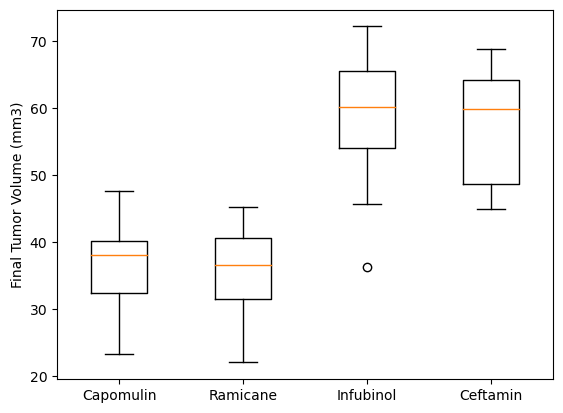

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [tumor_capomulin,tumor_ramicane,tumor_infubinol,tumor_ceftamin]
plt.boxplot(boxplot_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

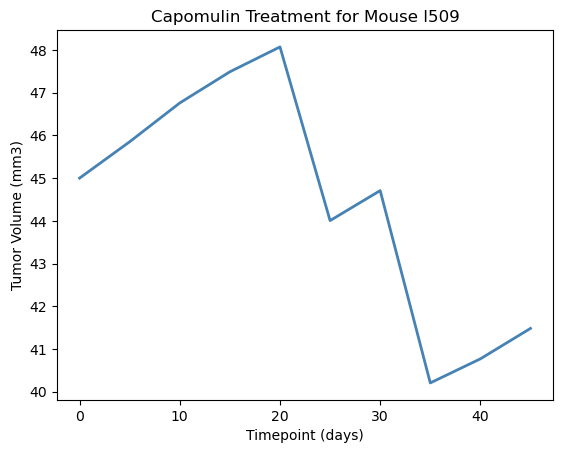

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_vol_vs_timepoint = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509', :]
TP_x_axis = tumor_vol_vs_timepoint['Timepoint']
size_of_tumor = tumor_vol_vs_timepoint['Tumor Volume (mm3)']

plt.plot (TP_x_axis, size_of_tumor, linewidth=2,color='steelblue')
plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

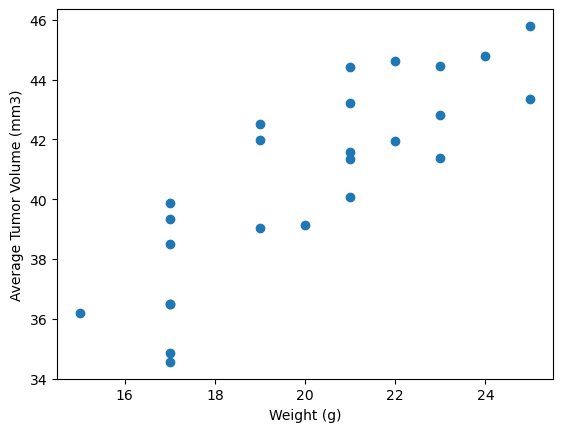

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_treatment_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin',:]
avg_cap_treatment_df = cap_treatment_df.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
plt.scatter(avg_cap_treatment_df['Weight (g)'],avg_cap_treatment_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


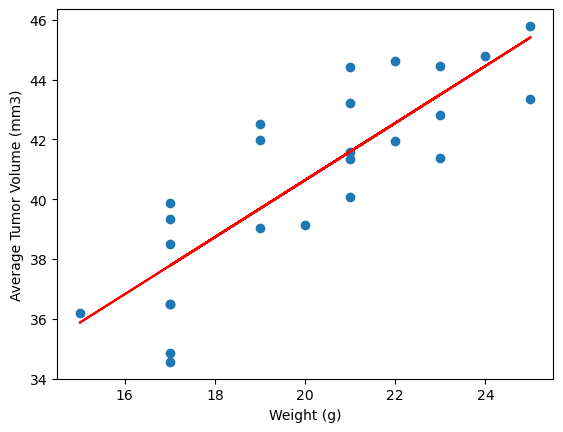

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = avg_cap_treatment_df['Weight (g)']
avrg_tmr_vol = avg_cap_treatment_df['Tumor Volume (mm3)']
print(f'The correlation between mouse weight and average observed tumor volume is {round(st.pearsonr(mouse_weight,avrg_tmr_vol)[0],2)}')

x_values = mouse_weight
y_values = avrg_tmr_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
